In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Election labelled.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Tweet_tokenized,sentiment
0,0,0,2020-06-22 18:59:35,1275141399638310914,rig election million OF mail in ballot w...,"['rig', 'election', 'million', 'OF', 'mail', '...",negative
1,1,1,2020-06-22 18:58:17,1275141071316619270,barr mail in ballot absolut open floodga...,"['barr', 'mail', 'in', 'ballot', 'absolut', 'o...",neutral
2,2,2,2020-06-22 18:58:00,1275141003050135553,rig election million OF mail in ballot w...,"['rig', 'election', 'million', 'OF', 'mail', '...",negative
3,3,3,2020-06-22 18:57:00,1275140748401401859,becaus mail in ballots rig elect nation ...,"['becaus', 'mail', 'in', 'ballots', 'rig', 'el...",negative
4,4,4,2020-06-22 18:54:42,1275140171483226115,ekww oklahoma primari elect june a...,"['ekww', 'oklahoma', 'primari', 'elect', 'june...",positive


In [2]:
df.shape

(200, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
Unnamed: 0         200 non-null int64
Unnamed: 0.1       200 non-null int64
Datetime           200 non-null object
Tweet Id           200 non-null int64
Text               200 non-null object
Tweet_tokenized    200 non-null object
sentiment          200 non-null object
dtypes: int64(3), object(4)
memory usage: 11.1+ KB


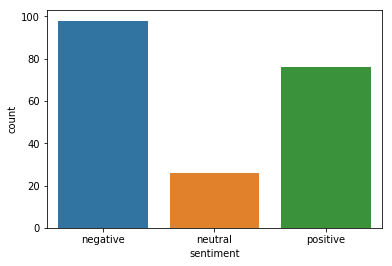

In [4]:
sns.countplot(df['sentiment'])

In [6]:
import nltk #nlp library
from nltk.corpus import stopwords
stop = stopwords.words("english")
df['Text'] = df['Text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Tweet_tokenized,sentiment
0,0,0,2020-06-22 18:59:35,1275141399638310914,rig election million OF mail ballot BE print B...,"['rig', 'election', 'million', 'OF', 'mail', '...",negative
1,1,1,2020-06-22 18:58:17,1275141071316619270,barr mail ballot absolut open floodgat fraud h...,"['barr', 'mail', 'in', 'ballot', 'absolut', 'o...",neutral
2,2,2,2020-06-22 18:58:00,1275141003050135553,rig election million OF mail ballot BE print B...,"['rig', 'election', 'million', 'OF', 'mail', '...",negative
3,3,3,2020-06-22 18:57:00,1275140748401401859,becaus mail ballots rig elect nation histori u...,"['becaus', 'mail', 'in', 'ballots', 'rig', 'el...",negative
4,4,4,2020-06-22 18:54:42,1275140171483226115,ekww oklahoma primari elect june registered ht...,"['ekww', 'oklahoma', 'primari', 'elect', 'june...",positive


In [8]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['Text'] = df['Text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [9]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
df['Text'] = df['Text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))

In [11]:
#Spell correction
from textblob import TextBlob
df['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    fig elect million of mail ballot of print of f...
1    bare mail ballot absolute open floodgat fraud ...
2    fig elect million of mail ballot of print of f...
3    beau mail ballot fig elect nation history unle...
4    www oklahoma primary elect june resist http co...
Name: Text, dtype: object

In [13]:
df['Text'] = df['Text'].apply(lambda x: " ".join([word.upper() for word in x.split()]))
df['Text'].head()

0    RIG ELECT MILLION OF MAIL BALLOT BE PRINT BY F...
1    BARR MAIL BALLOT ABSOLUT OPEN FLOODGAT FRAUD H...
2    RIG ELECT MILLION OF MAIL BALLOT BE PRINT BY F...
3    BECAU MAIL BALLOT RIG ELECT NATION HISTORI UNL...
4    EKWW OKLAHOMA PRIMARI ELECT JUNE REGIST HTTP C...
Name: Text, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=379, max_df=0.7)  
x = tfidfconverter.fit_transform(df['Text']).toarray()

In [16]:
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

y = df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 1000000)
#scores = cross_val_score(lr, x_train,y_train, cv=10)
logreg = lr.fit(x_train,y_train)
prediction = logreg.predict(x_test)
metrics.accuracy_score(y_test,prediction)

0.925

In [18]:
metrics.confusion_matrix(y_test, prediction)

array([[22,  0,  0],
       [ 1,  6,  2],
       [ 0,  0,  9]], dtype=int64)

In [19]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        22
     neutral       1.00      0.67      0.80         9
    positive       0.82      1.00      0.90         9

    accuracy                           0.93        40
   macro avg       0.92      0.89      0.89        40
weighted avg       0.94      0.93      0.92        40



In [20]:

from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(x_train, y_train)
prediction = naive.predict(x_test)

metrics.accuracy_score(y_test, prediction)

0.925

In [21]:
metrics.confusion_matrix(y_test, prediction)

array([[22,  0,  0],
       [ 1,  6,  2],
       [ 0,  0,  9]], dtype=int64)

In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        22
     neutral       1.00      0.67      0.80         9
    positive       0.82      1.00      0.90         9

    accuracy                           0.93        40
   macro avg       0.92      0.89      0.89        40
weighted avg       0.94      0.93      0.92        40



In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(x_train, y_train)

y_pred=xgb.predict(x_test)

print("Accuracy\n",accuracy_score(y_test, y_pred))
print("\n\nCOnfusion Matrix\n",confusion_matrix(y_test, y_pred))
print("\n\nClassification Report\n",classification_report(y_test, y_pred))

Accuracy
 0.95


COnfusion Matrix
 [[22  0  0]
 [ 0  7  2]
 [ 0  0  9]]


Classification Report
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        22
     neutral       1.00      0.78      0.88         9
    positive       0.82      1.00      0.90         9

    accuracy                           0.95        40
   macro avg       0.94      0.93      0.92        40
weighted avg       0.96      0.95      0.95        40

